# Walmart Sales Forecasting

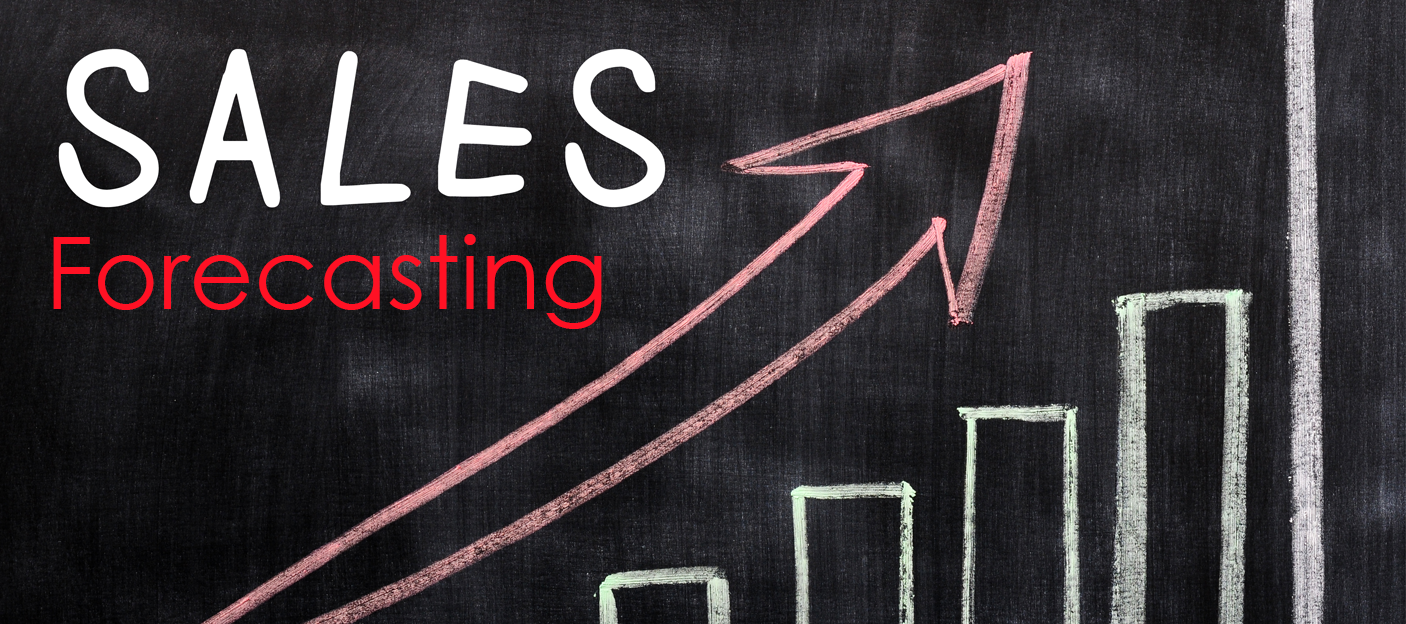

# Importing Necessary Libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import iplot

from sklearn.model_selection import train_test_split
from math import sqrt
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import warnings

# Load the datasets

In [2]:
train_df = pd.read_csv('/content/drive/MyDrive/Data Science Projects/walmart data/train.csv')
features_df = pd.read_csv('/content/drive/MyDrive/Data Science Projects/walmart data/features.csv')
stores_df = pd.read_csv('/content/drive/MyDrive/Data Science Projects/walmart data/stores.csv')
test_df = pd.read_csv('/content/drive/MyDrive/Data Science Projects/walmart data/test.csv')

In [3]:
train_df.head()

Store  Dept        Date  Weekly_Sales  IsHoliday
0      1     1  2010-02-05      24924.50      False
1      1     1  2010-02-12      46039.49       True
2      1     1  2010-02-19      41595.55      False
3      1     1  2010-02-26      19403.54      False
4      1     1  2010-03-05      21827.90      False

In [4]:
train_df.shape

(421570, 5)

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [6]:
train_df.describe()

Store           Dept   Weekly_Sales
count  421570.000000  421570.000000  421570.000000
mean       22.200546      44.260317   15981.258123
std        12.785297      30.492054   22711.183519
min         1.000000       1.000000   -4988.940000
25%        11.000000      18.000000    2079.650000
50%        22.000000      37.000000    7612.030000
75%        33.000000      74.000000   20205.852500
max        45.000000      99.000000  693099.360000

In [7]:
train_df.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday'], dtype='object')

In [8]:
train_df.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

In [9]:
features_df.head()

Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0      1  2010-02-05        42.31       2.572        NaN        NaN   
1      1  2010-02-12        38.51       2.548        NaN        NaN   
2      1  2010-02-19        39.93       2.514        NaN        NaN   
3      1  2010-02-26        46.63       2.561        NaN        NaN   
4      1  2010-03-05        46.50       2.625        NaN        NaN   

   MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  
0        NaN        NaN        NaN  211.096358         8.106      False  
1        NaN        NaN        NaN  211.242170         8.106       True  
2        NaN        NaN        NaN  211.289143         8.106      False  
3        NaN        NaN        NaN  211.319643         8.106      False  
4        NaN        NaN        NaN  211.350143         8.106      False

In [10]:
features_df.columns

Index(['Store', 'Date', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment',
       'IsHoliday'],
      dtype='object')

In [11]:
features_df.shape

(8190, 12)

In [12]:
features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [13]:
features_df.describe()

Store  Temperature   Fuel_Price      MarkDown1      MarkDown2  \
count  8190.000000  8190.000000  8190.000000    4032.000000    2921.000000   
mean     23.000000    59.356198     3.405992    7032.371786    3384.176594   
std      12.987966    18.678607     0.431337    9262.747448    8793.583016   
min       1.000000    -7.290000     2.472000   -2781.450000    -265.760000   
25%      12.000000    45.902500     3.041000    1577.532500      68.880000   
50%      23.000000    60.710000     3.513000    4743.580000     364.570000   
75%      34.000000    73.880000     3.743000    8923.310000    2153.350000   
max      45.000000   101.950000     4.468000  103184.980000  104519.540000   

           MarkDown3     MarkDown4      MarkDown5          CPI  Unemployment  
count    3613.000000   3464.000000    4050.000000  7605.000000   7605.000000  
mean     1760.100180   3292.935886    4132.216422   172.460809      7.826821  
std     11276.462208   6792.329861   13086.690278    39.738346      1.877259  
min      -179.260000      0.220000    -185.170000   126.064000      3.684000  
25%         6.600000    304.687500    1440.827500   132.364839      6.634000  
50%        36.260000   1176.425000    2727.135000   182.764003      7.806000  
75%       163.150000   3310.007500    4832.555000   213.932412      8.567000  
max    149483.310000  67474.850000  771448.100000   228.976456     14.313000

In [14]:
features_df.isnull().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

In [15]:
stores_df.head()

Store Type    Size
0      1    A  151315
1      2    A  202307
2      3    B   37392
3      4    A  205863
4      5    B   34875

In [16]:
stores_df.shape

(45, 3)

In [17]:
stores_df.columns

Index(['Store', 'Type', 'Size'], dtype='object')

In [18]:
stores_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


In [19]:
stores_df.describe()

Store           Size
count  45.000000      45.000000
mean   23.000000  130287.600000
std    13.133926   63825.271991
min     1.000000   34875.000000
25%    12.000000   70713.000000
50%    23.000000  126512.000000
75%    34.000000  202307.000000
max    45.000000  219622.000000

In [20]:
stores_df.isnull().sum()

Store    0
Type     0
Size     0
dtype: int64

In [21]:
labels = stores_df['Type'].value_counts()[:10].index
values = stores_df['Type'].value_counts()[:10].values

colors = stores_df['Type']

fig = go.Figure(data=[go.Pie(labels=labels,values=values,textinfo='label+percent',marker=dict(colors=colors))])
fig.show()

In [22]:
# since features and store have 'Store' as a common lets merge the data

data = features_df.merge(stores_df,how='inner',on='Store')

In [23]:
data.columns

Index(['Store', 'Date', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment',
       'IsHoliday', 'Type', 'Size'],
      dtype='object')

In [24]:
data.head()

Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0      1  2010-02-05        42.31       2.572        NaN        NaN   
1      1  2010-02-12        38.51       2.548        NaN        NaN   
2      1  2010-02-19        39.93       2.514        NaN        NaN   
3      1  2010-02-26        46.63       2.561        NaN        NaN   
4      1  2010-03-05        46.50       2.625        NaN        NaN   

   MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday Type  \
0        NaN        NaN        NaN  211.096358         8.106      False    A   
1        NaN        NaN        NaN  211.242170         8.106       True    A   
2        NaN        NaN        NaN  211.289143         8.106      False    A   
3        NaN        NaN        NaN  211.319643         8.106      False    A   
4        NaN        NaN        NaN  211.350143         8.106      False    A   

     Size  
0  151315  
1  151315  
2  151315  
3  151315  
4  151315

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8190 entries, 0 to 8189
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
 12  Type          8190 non-null   object 
 13  Size          8190 non-null   int64  
dtypes: bool(1), float64(9), int64(2), object(2)
memory usage: 903.8+ KB


In [26]:
data.isnull().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
Type               0
Size               0
dtype: int64

In [27]:
data.describe()

Store  Temperature   Fuel_Price      MarkDown1      MarkDown2  \
count  8190.000000  8190.000000  8190.000000    4032.000000    2921.000000   
mean     23.000000    59.356198     3.405992    7032.371786    3384.176594   
std      12.987966    18.678607     0.431337    9262.747448    8793.583016   
min       1.000000    -7.290000     2.472000   -2781.450000    -265.760000   
25%      12.000000    45.902500     3.041000    1577.532500      68.880000   
50%      23.000000    60.710000     3.513000    4743.580000     364.570000   
75%      34.000000    73.880000     3.743000    8923.310000    2153.350000   
max      45.000000   101.950000     4.468000  103184.980000  104519.540000   

           MarkDown3     MarkDown4      MarkDown5          CPI  Unemployment  \
count    3613.000000   3464.000000    4050.000000  7605.000000   7605.000000   
mean     1760.100180   3292.935886    4132.216422   172.460809      7.826821   
std     11276.462208   6792.329861   13086.690278    39.738346      1.877259   
min      -179.260000      0.220000    -185.170000   126.064000      3.684000   
25%         6.600000    304.687500    1440.827500   132.364839      6.634000   
50%        36.260000   1176.425000    2727.135000   182.764003      7.806000   
75%       163.150000   3310.007500    4832.555000   213.932412      8.567000   
max    149483.310000  67474.850000  771448.100000   228.976456     14.313000   

                Size  
count    8190.000000  
mean   130287.600000  
std     63115.971429  
min     34875.000000  
25%     70713.000000  
50%    126512.000000  
75%    202307.000000  
max    219622.000000

In [28]:
labels = data['Type'].value_counts()[:10].index
values = data['Type'].value_counts()[:10].values

colors = data['Type']

fig = go.Figure(data=[go.Pie(labels=labels,values=values,textinfo='label+percent',marker=dict(colors=colors))])
fig.show()

In [29]:
test_df.head()

Store  Dept        Date  IsHoliday
0      1     1  2012-11-02      False
1      1     1  2012-11-09      False
2      1     1  2012-11-16      False
3      1     1  2012-11-23       True
4      1     1  2012-11-30      False

In [30]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115064 entries, 0 to 115063
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Store      115064 non-null  int64 
 1   Dept       115064 non-null  int64 
 2   Date       115064 non-null  object
 3   IsHoliday  115064 non-null  bool  
dtypes: bool(1), int64(2), object(1)
memory usage: 2.7+ MB


In [31]:
labels = train_df['Dept'].value_counts()[:10].index
values = train_df['Dept'].value_counts()[:10].values

colors = train_df['Dept']

fig = go.Figure(data=[go.Pie(labels=labels,values=values,textinfo='label+percent',marker=dict(colors=colors))])
fig.show()

In [32]:
labels = train_df['Store'].value_counts()[:10].index
values = train_df['Store'].value_counts()[:10].values

colors = train_df['Store']

fig = go.Figure(data=[go.Pie(labels=labels,values=values,textinfo='label+percent',marker=dict(colors=colors))])
fig.show()

In [33]:
labels = train_df['IsHoliday'].value_counts().index
values = train_df['IsHoliday'].value_counts().values

colors = train_df['IsHoliday']

fig = go.Figure(data=[go.Pie(labels=labels,values=values,textinfo='label+percent',marker=dict(colors=colors))])
fig.show()

Output hidden; open in https://colab.research.google.com to view.

In [34]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [35]:
from  datetime import datetime

data['Date'] = pd.to_datetime(data['Date'])
train_df['Date'] = pd.to_datetime(train_df['Date'])
features_df['Date'] = pd.to_datetime(features_df['Date'])
test_df['Date'] = pd.to_datetime(test_df['Date'])

In [36]:
data['Week'] = data.Date.dt.week
data['Year'] = data.Date.dt.year
data.head()

<ipython-input-36-7674dab4c9d0>:1: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.



Store       Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  MarkDown3  \
0      1 2010-02-05        42.31       2.572        NaN        NaN        NaN   
1      1 2010-02-12        38.51       2.548        NaN        NaN        NaN   
2      1 2010-02-19        39.93       2.514        NaN        NaN        NaN   
3      1 2010-02-26        46.63       2.561        NaN        NaN        NaN   
4      1 2010-03-05        46.50       2.625        NaN        NaN        NaN   

   MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday Type    Size  \
0        NaN        NaN  211.096358         8.106      False    A  151315   
1        NaN        NaN  211.242170         8.106       True    A  151315   
2        NaN        NaN  211.289143         8.106      False    A  151315   
3        NaN        NaN  211.319643         8.106      False    A  151315   
4        NaN        NaN  211.350143         8.106      False    A  151315   

   Week  Year  
0     5  2010  
1     6  2010  
2     7  2010  
3     8  2010  
4     9  2010

In [37]:
# Merging with train_df

train_merge = train_df.merge(data,how='inner',on=['Store','Date','IsHoliday']).sort_values(by=['Store','Dept','Date'])

In [38]:
test_merge = test_df.merge(data,how='inner',on=['Store','Date','IsHoliday']).sort_values(by=['Store','Dept','Date'])


In [39]:
def scatter(train_merge,column):
  plt.Figure(figsize=(15,8))
  plt.scatter(train_merge[column],train_merge['Weekly_Sales'])
  plt.ylabel('Weekly_Sales')
  plt.xlabel(column)
  plt.show()

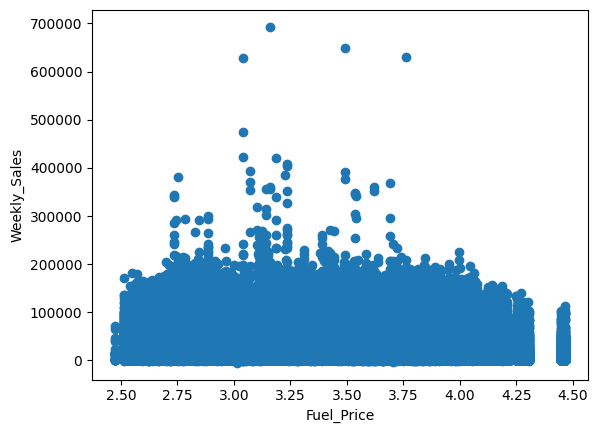

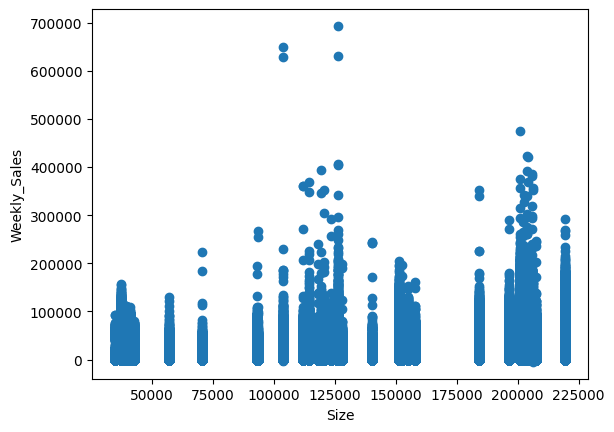

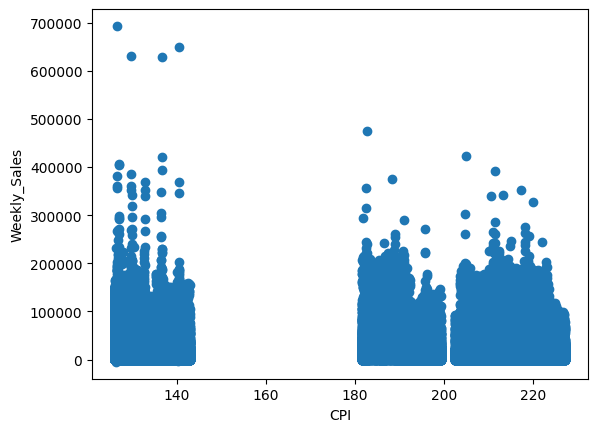

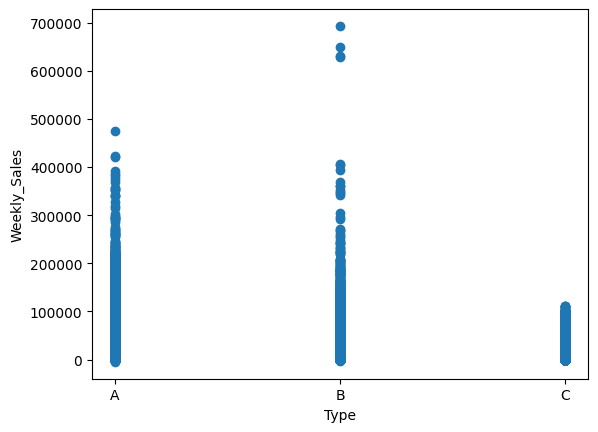

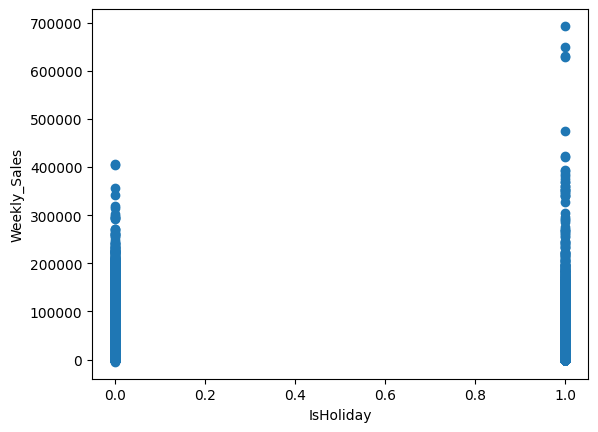

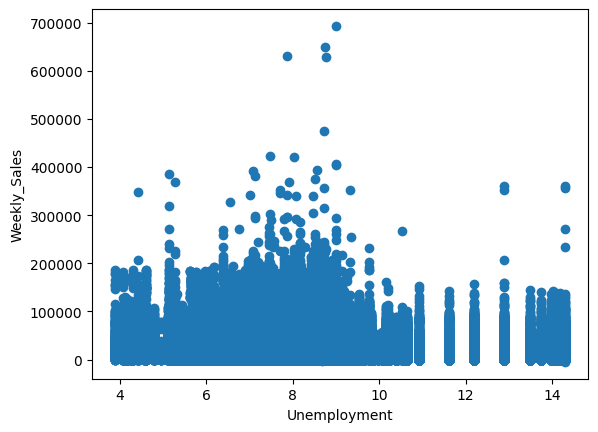

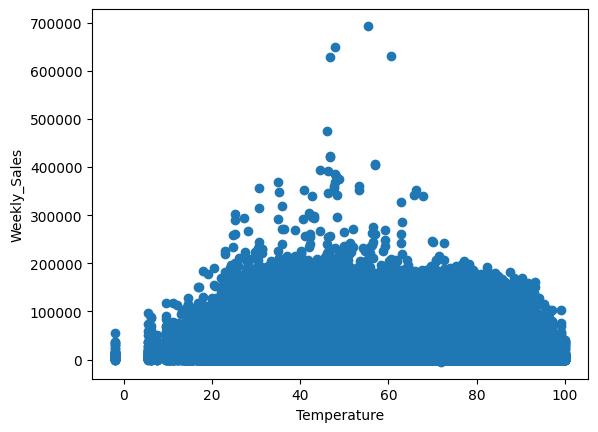

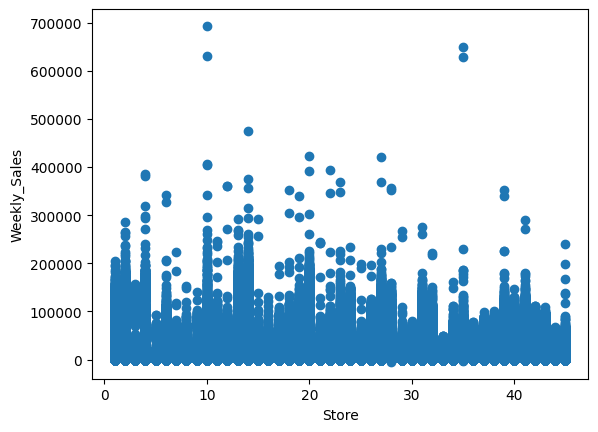

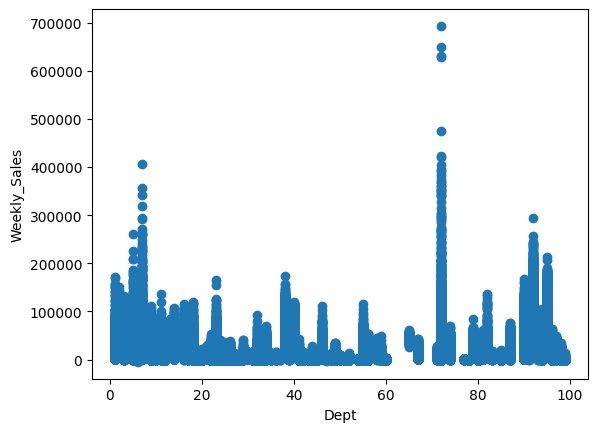

In [40]:
scatter(train_merge,'Fuel_Price')
print('\n')
scatter(train_merge,'Size')
print('\n')
scatter(train_merge,'CPI')
print('\n')
scatter(train_merge,'Type')
print('\n')
scatter(train_merge,'IsHoliday')
print('\n')
scatter(train_merge,'Unemployment')
print('\n')
scatter(train_merge,'Temperature')
print('\n')
scatter(train_merge,'Store')
print('\n')
scatter(train_merge,'Dept')



# Correlation Matrix

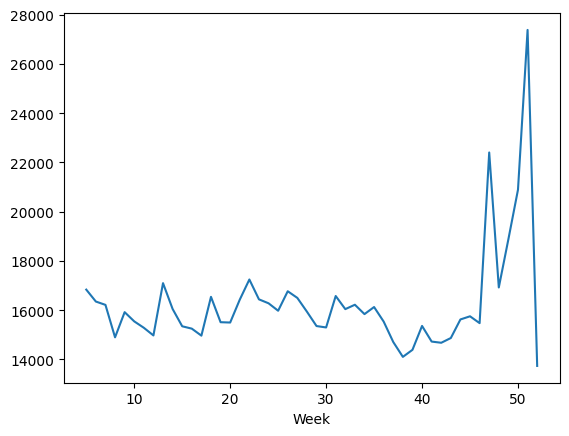

In [41]:
# Average weekly sales for the year 2010
weekly_sales_2010 = train_merge[train_merge['Year']==2010]['Weekly_Sales'].groupby(train_merge['Week']).mean()
sns.lineplot(x=weekly_sales_2010.index,y= weekly_sales_2010.values)
plt.show()

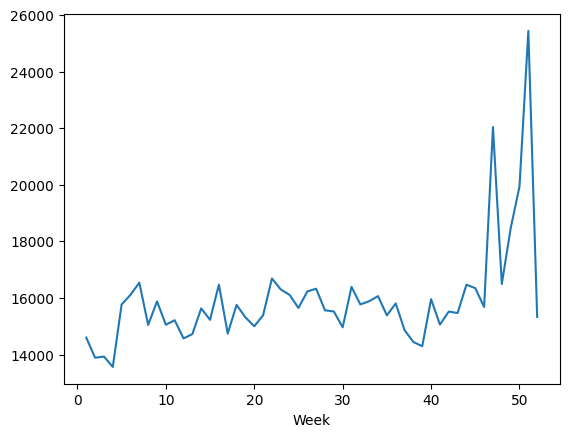

In [42]:
# Average weekly sales for the year 2011
weekly_sales_2011 = train_merge[train_merge['Year']==2011]['Weekly_Sales'].groupby(train_merge['Week']).mean()
sns.lineplot(x = weekly_sales_2011.index,y = weekly_sales_2011.values)
plt.show()

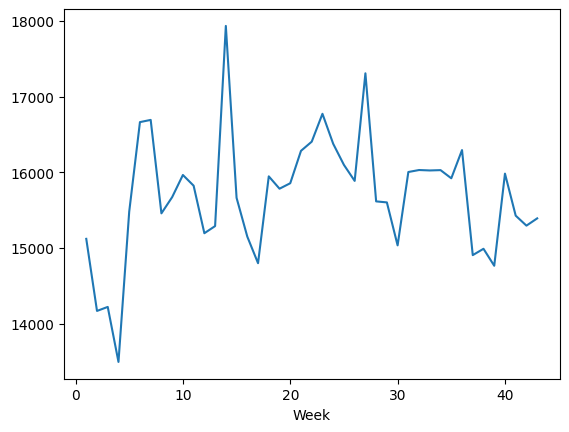

In [43]:
# Average weekly sales for the year 2012
weekly_sales_2012 = train_merge[train_merge['Year']==2012]['Weekly_Sales'].groupby(train_merge['Week']).mean()
sns.lineplot(x = weekly_sales_2012.index,y = weekly_sales_2012.values)
plt.show()

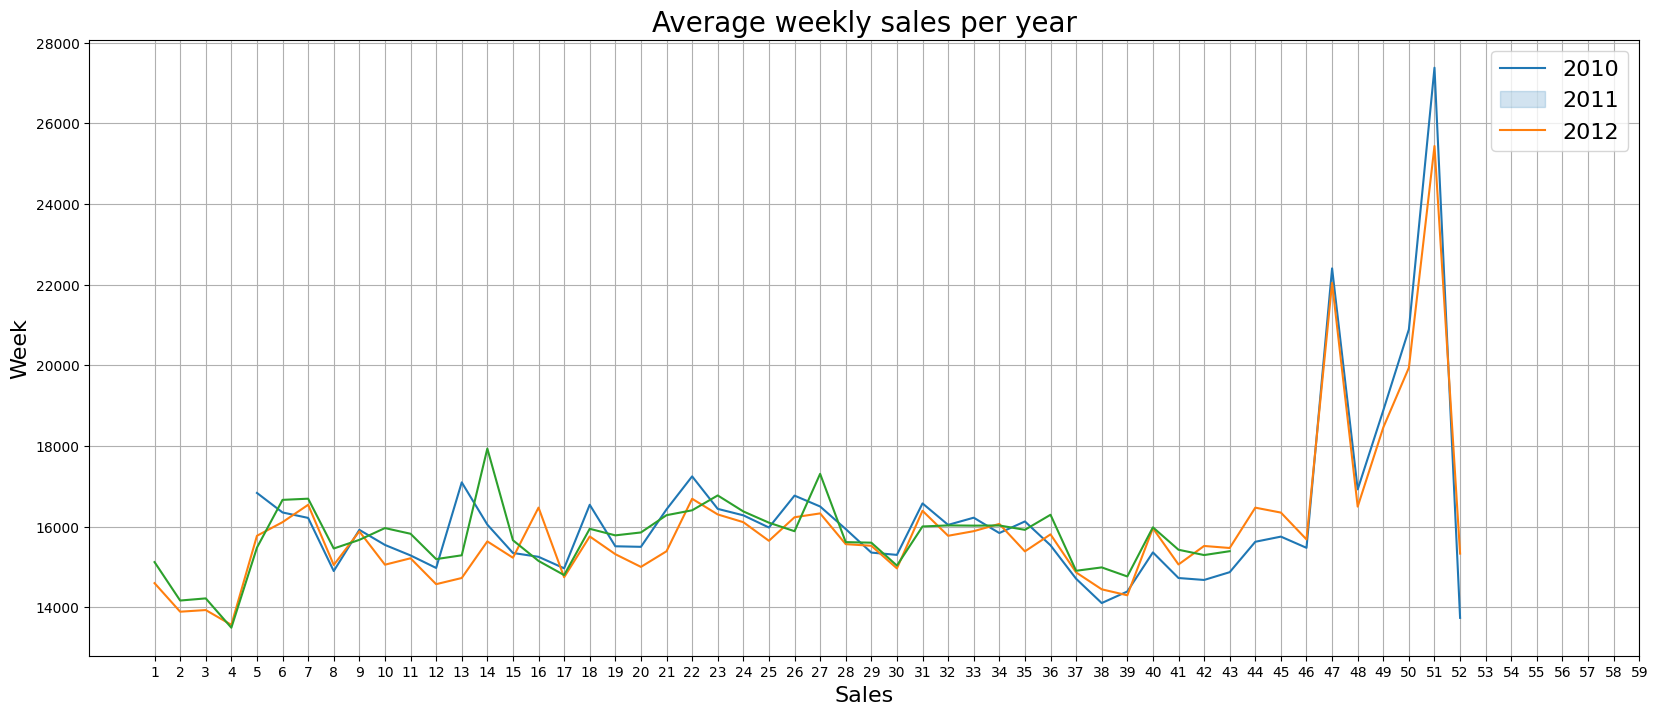

In [44]:
# Ploting the above three plot together

plt.figure(figsize=(20,8))
sns.lineplot(x=weekly_sales_2010.index,y= weekly_sales_2010.values)
sns.lineplot(x=weekly_sales_2011.index,y= weekly_sales_2011.values)
sns.lineplot(x=weekly_sales_2012.index,y= weekly_sales_2012.values)
plt.grid()
plt.xticks(np.arange(1,60,step=1))
plt.legend(['2010','2011','2012'],loc='best',fontsize=16)
plt.title('Average weekly sales per year',fontsize=20)
plt.xlabel('Sales',fontsize=16)
plt.ylabel('Week',fontsize=16)
plt.show()


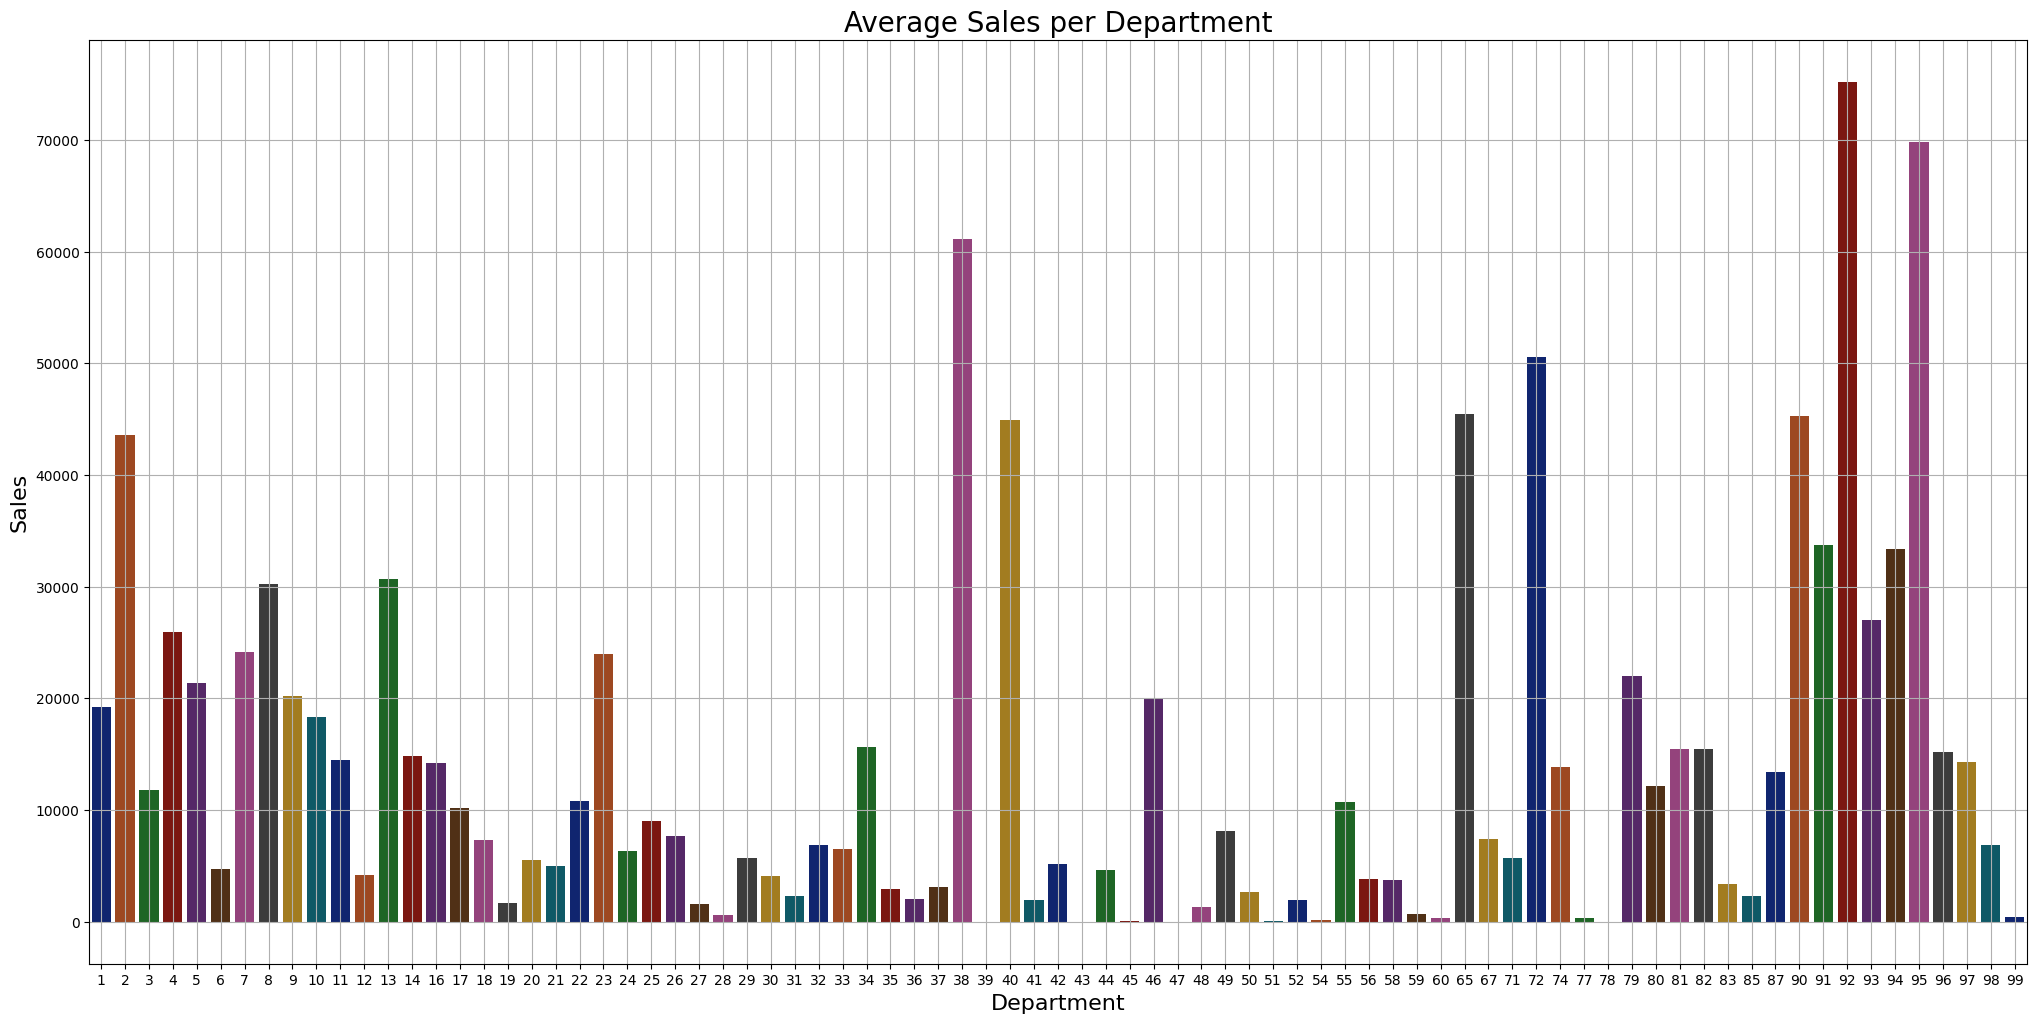

In [45]:
# Average sales per Department
weekly_sales = train_merge['Weekly_Sales'].groupby(train_merge['Dept']).mean()
plt.figure(figsize=(25,12))
sns.barplot(x=weekly_sales.index,y=weekly_sales.values,palette='dark')
plt.grid()
plt.title('Average Sales per Department',fontsize=20)
plt.xlabel('Department',fontsize=16)
plt.ylabel('Sales',fontsize=16)
plt.show()

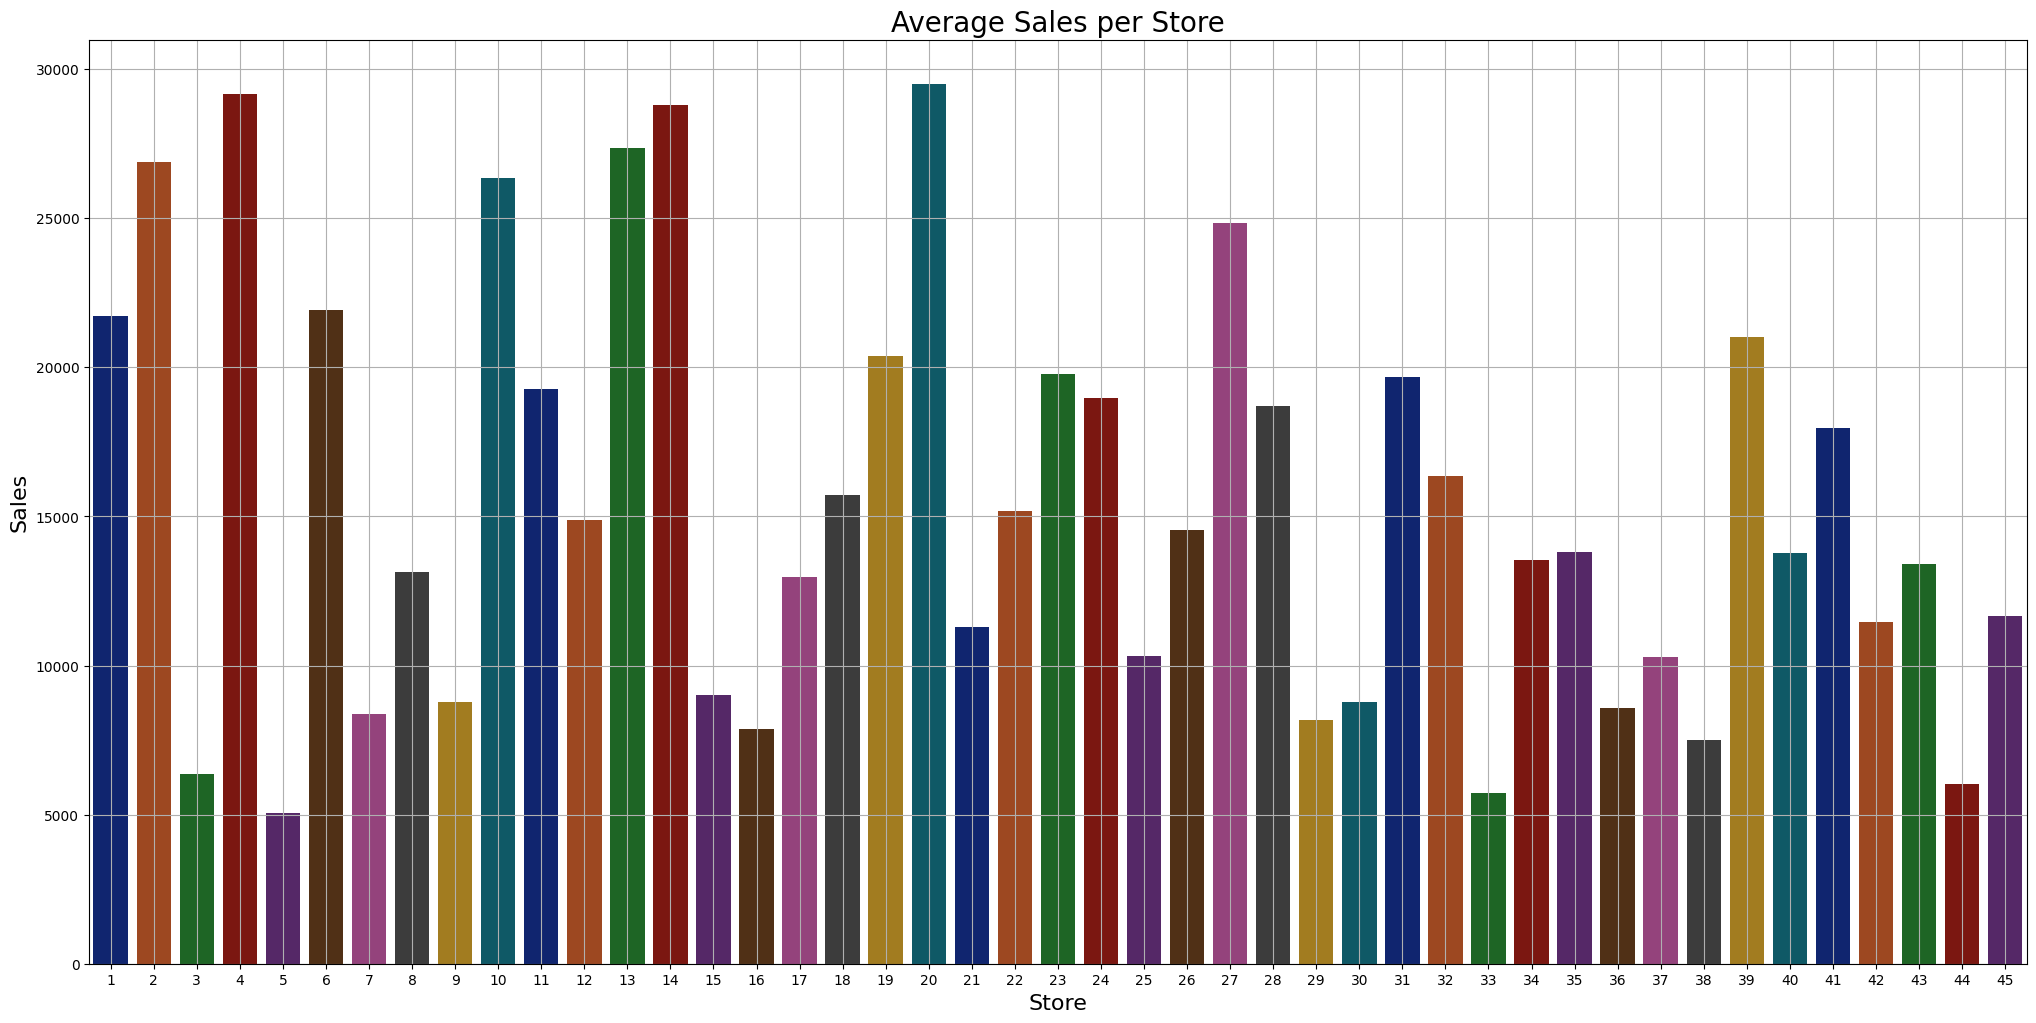

In [46]:
# Average sale per store

weekly_sales = train_merge['Weekly_Sales'].groupby(train_merge['Store']).mean()
plt.figure(figsize=(25,12))
sns.barplot(x=weekly_sales.index,y=weekly_sales.values,palette='dark')
plt.grid()
plt.title('Average Sales per Store',fontsize=20)
plt.xlabel('Store',fontsize=16)
plt.ylabel('Sales',fontsize=16)
plt.show()


<ipython-input-47-51b9a32423fa>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.

<ipython-input-47-51b9a32423fa>:3: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



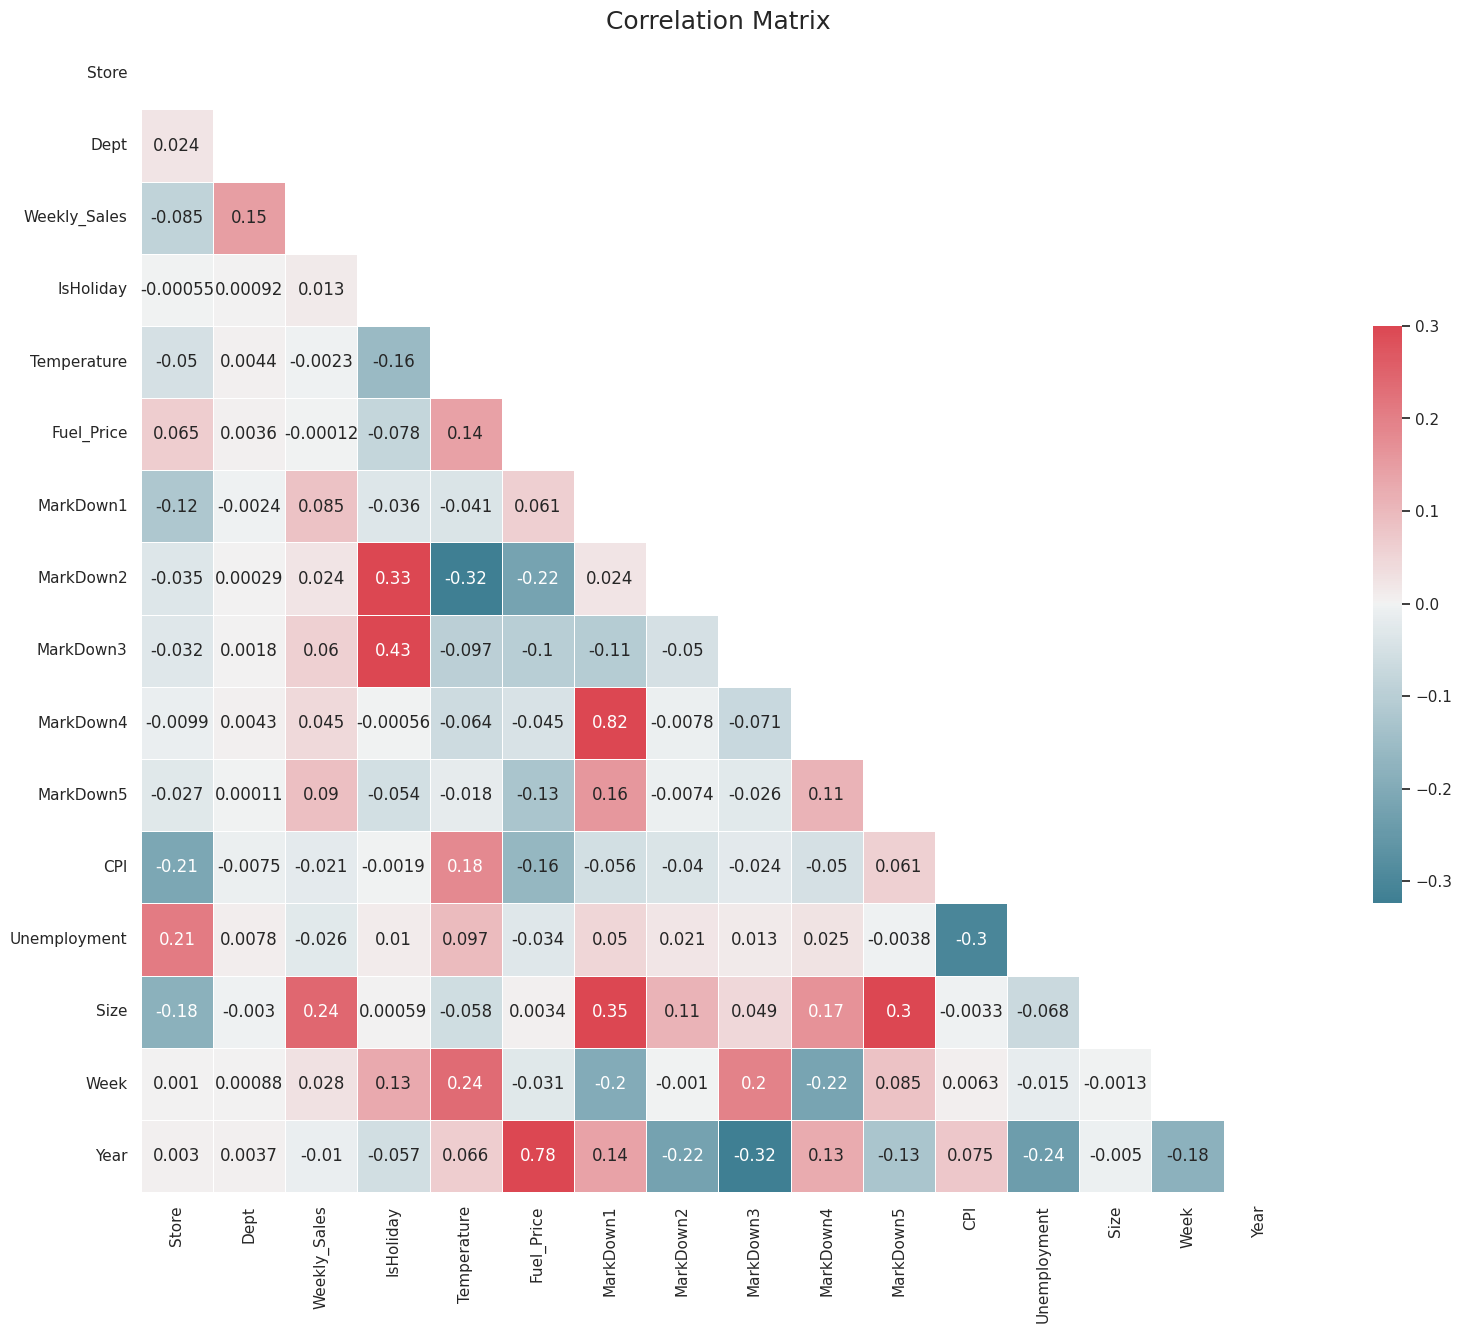

In [47]:
sns.set(style='white')
corr = train_merge.corr()
mask = np.triu(np.ones_like(corr,dtype=np.bool))
f,ax = plt.subplots(figsize=(20,15))
cmap = sns.diverging_palette(220,10,as_cmap=True)
plt.title('Correlation Matrix',fontsize=18)
sns.heatmap(corr,mask=mask,cmap=cmap,vmax=.3,center=0,square=True,linewidths=.5,cbar_kws={'shrink':.5},annot=True)
plt.show()

In [48]:
train_merge.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'Type', 'Size', 'Week', 'Year'],
      dtype='object')

In [50]:
# columns=Droping columns which have less or negative corr

train_merge = train_merge.drop(columns=['Fuel_Price','MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'])
test_merge = test_merge.drop(columns=['Fuel_Price','MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'])


In [51]:
train_merge.head()

Store  Dept       Date  Weekly_Sales  IsHoliday  Temperature         CPI  \
0        1     1 2010-02-05      24924.50      False        42.31  211.096358   
73       1     1 2010-02-12      46039.49       True        38.51  211.242170   
145      1     1 2010-02-19      41595.55      False        39.93  211.289143   
218      1     1 2010-02-26      19403.54      False        46.63  211.319643   
290      1     1 2010-03-05      21827.90      False        46.50  211.350143   

     Unemployment Type    Size  Week  Year  
0           8.106    A  151315     5  2010  
73          8.106    A  151315     6  2010  
145         8.106    A  151315     7  2010  
218         8.106    A  151315     8  2010  
290         8.106    A  151315     9  2010

In [52]:
test_merge.head()

Store  Dept       Date  IsHoliday  Temperature         CPI  Unemployment  \
0        1     1 2012-11-02      False        55.32  223.462779         6.573   
71       1     1 2012-11-09      False        61.24  223.481307         6.573   
142      1     1 2012-11-16      False        52.92  223.512911         6.573   
213      1     1 2012-11-23       True        56.23  223.561947         6.573   
285      1     1 2012-11-30      False        52.34  223.610984         6.573   

    Type    Size  Week  Year  
0      A  151315    44  2012  
71     A  151315    45  2012  
142    A  151315    46  2012  
213    A  151315    47  2012  
285    A  151315    48  2012

In [54]:
train_df['Dept'].nunique()

81

In [55]:
train_df['Store'].nunique()

45

In [56]:
train_merge.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Temperature',
       'CPI', 'Unemployment', 'Type', 'Size', 'Week', 'Year'],
      dtype='object')

In [57]:
test_merge.columns

Index(['Store', 'Dept', 'Date', 'IsHoliday', 'Temperature', 'CPI',
       'Unemployment', 'Type', 'Size', 'Week', 'Year'],
      dtype='object')

Dividing the dataset into Train and Test

In [58]:
X = train_merge[['Store','Dept','IsHoliday','Size','Week','Year']]
y = train_merge['Weekly_Sales']

Model Building

In [59]:
# split dataset 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [60]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((295099, 6), (126471, 6), (295099,), (126471,))

In [62]:
# performing GridsearchCV on ridge Regrssion
params = {'alpha':[0.0001,0.001,0.01,0.1,1,10,100,1000,10000,100000]}
ridge_regressor = GridSearchCV(Ridge(),params,cv=7,scoring='neg_mean_absolute_error',n_jobs= -1)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=7, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                                   10000, 100000]},
             scoring='neg_mean_absolute_error')

In [63]:
# Predicting train and test results
y_train_pred = ridge_regressor.predict(X_train)
y_test_pred = ridge_regressor.predict(X_test)


In [65]:
print('Train Results for ridge Regressor Model:')
print('Root Mean Squared Error: ',sqrt(mse(y_train.values,y_train_pred)))
print('R-squared: ',r2_score(y_train.values,y_train_pred))

Train Results for ridge Regressor Model:
Root Mean Squared Error:  21696.189989134735
R-squared:  0.08442134387348976


In [66]:
print('Test Results for ridge Regressor Model:')
print('Root Mean Squared Error: ',sqrt(mse(y_test.values,y_test_pred)))
print('R-squared: ',r2_score(y_test.values,y_test_pred))

Test Results for ridge Regressor Model:
Root Mean Squared Error:  21811.998658223216
R-squared:  0.08452464107207469


In [67]:
# Performing GridsearchCV on Lasso Regression
params = {'alpha':[0.0001,0.001,0.01,0.1,1,10,100,1000,10000,100000]}
lasso_regressor = GridSearchCV(Lasso(),params,cv=7,scoring='neg_mean_absolute_error',n_jobs= -1)
lasso_regressor.fit(X_train,y_train)

GridSearchCV(cv=7, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                                   10000, 100000]},
             scoring='neg_mean_absolute_error')

In [68]:
# Predicting train and test results
y_train_pred = lasso_regressor.predict(X_train)
y_test_pred = lasso_regressor.predict(X_test)

In [69]:
print('Train Results for Lasso Regressor Model:')
print('Root Mean Squared Error: ',sqrt(mse(y_train.values,y_train_pred)))
print('R-squared: ',r2_score(y_train.values,y_train_pred))

Train Results for Lasso Regressor Model:
Root Mean Squared Error:  21975.472790897762
R-squared:  0.060698178849947215


In [70]:
print('Test Results for Lasso Regressor Model:')
print('Root Mean Squared Error: ',sqrt(mse(y_test.values,y_test_pred)))
print('R-squared: ',r2_score(y_test.values,y_test_pred))

Test Results for Lasso Regressor Model:
Root Mean Squared Error:  22092.154357868425
R-squared:  0.06085668250157994


In [71]:
# Performing GridsearchCV on Decision Tree regressor

from sklearn.tree import DecisionTreeRegressor

depth = list(range(3,30))
param_grid = dict(max_depth = depth)
tree = GridSearchCV(DecisionTreeRegressor(),param_grid,cv=10)
tree.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                                       15, 16, 17, 18, 19, 20, 21, 22, 23, 24,
                                       25, 26, 27, 28, 29]})

In [72]:
# Predicting train and test results
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

In [73]:
print('Train Results for Decision Tree Model:')
print('Root Mean Squared Error: ',sqrt(mse(y_train.values,y_train_pred)))
print('R-squared: ',r2_score(y_train.values,y_train_pred))

Train Results for Decision Tree Model:
Root Mean Squared Error:  1088.8493080326737
R-squared:  0.9976939736347776


In [74]:
print('Test Results for Decision Tree Model:')
print('Root Mean Squared Error: ',sqrt(mse(y_test.values,y_test_pred)))
print('R-squared: ',r2_score(y_test.values,y_test_pred))

Test Results for Decision Tree Model:
Root Mean Squared Error:  4912.627143007108
R-squared:  0.9535609484261782


In [75]:
from sklearn.ensemble import RandomForestRegressor

tuned_params = {'n_estimators':[100,200],'min_samples_split':[2,5,10],'min_samples_leaf':[1,2,4]}
random_regressor = RandomizedSearchCV(RandomForestRegressor(),tuned_params,n_iter=3,scoring='neg_mean_absolute_error',n_jobs=-1)
random_regressor.fit(X_train,y_train)

RandomizedSearchCV(estimator=RandomForestRegressor(), n_iter=3, n_jobs=-1,
                   param_distributions={'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200]},
                   scoring='neg_mean_absolute_error')

In [76]:
# Predicting train and test results
y_train_pred = random_regressor.predict(X_train)
y_test_pred = random_regressor.predict(X_test)

In [77]:
print('Train Results for Random Regresor Model:')
print('Root Mean Squared Error: ',sqrt(mse(y_train.values,y_train_pred)))
print('R-squared: ',r2_score(y_train.values,y_train_pred))

Train Results for Random Regresor Model:
Root Mean Squared Error:  2148.363637285105
R-squared:  0.9910227298301324


In [78]:
print('Test Results for Random Regresor Model:')
print('Root Mean Squared Error: ',sqrt(mse(y_test.values,y_test_pred)))
print('R-squared: ',r2_score(y_test.values,y_test_pred))

Test Results for Random Regresor Model:
Root Mean Squared Error:  3850.7762359766934
R-squared:  0.9714666804147823
